# Classification - Example
In this script we demonstrate how a Machine Learning workflow can look like when you use a train, validation and test set. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Loading Data

In [3]:
# This code is merely executed to see the description and target names in a smooth way - load_iris is a function
iris = load_iris() 

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [25]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
pd.dataframe = iris

## Storing/Loading the data in the way it will be used

In [29]:
X, y = load_iris(return_X_y=True, as_frame=True)

# Only choose two variables for my model
X = X[['sepal length (cm)', 'sepal width (cm)']]

In [30]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
X

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [9]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB
None


In [10]:
print(y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: target
Non-Null Count  Dtype
--------------  -----
150 non-null    int32
dtypes: int32(1)
memory usage: 732.0 bytes
None


In [36]:
y.tail()

145    2
146    2
147    2
148    2
149    2
Name: target, dtype: int32

In [32]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Train, Validation, and Test Set

In [37]:
# Function train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=36)

# EDA
We are only allowed to explore / learn things on the training data when creating our model. 

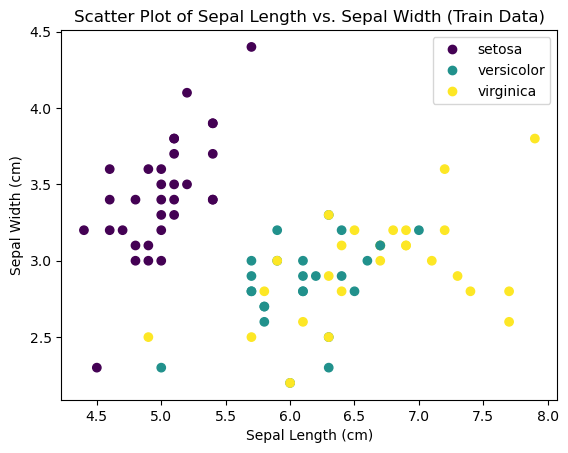

In [56]:
classes = ['setosa', 'versicolor', 'virginica']
scatter = plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs. Sepal Width (Train Data)')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

In [13]:
X_train.head()

,sepal length (cm),sepal width (cm)
72,6.3,2.5
62,6.0,2.2
74,6.4,2.9
19,5.1,3.8
93,5.0,2.3


In [14]:
y_train.head()

72    1
62    1
74    1
19    0
93    1
Name: target, dtype: int32

In [15]:
# 0 = 'setosa', 1 = 'versicolor', 2 = 'virginica'
y_train.value_counts()

target
0    32
1    26
2    26
Name: count, dtype: int64

# Training 2 different models

In [57]:
# Instanciera en logisticRegression model (class) och spara modellen i variabeln log_reg

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.coef_)

#log_reg_pred = log_reg.predict(X_val)

[[-0.51245501  0.68307611 -2.13743005 -0.83641495]
 [ 0.54877653 -0.13527772 -0.17190547 -0.71890593]
 [-0.03632153 -0.54779839  2.30933553  1.55532088]]


In [17]:
tree_clf = DecisionTreeClassifier()

# Finding the best hyperparameter through GridSearch.# these hyperparams check for tree depth from overfitting none to underfitting 1 etc
hyper_params = {'max_depth':(None, 1, 2, 5, 10)}
clf = GridSearchCV(tree_clf, hyper_params)
# clf instance for GridSearch CV to find best HP in tree instance

clf.fit(X_train, y_train) # find which HP is best and then will retrain model w best HP
clf_pred = clf.predict(X_val) # predict validation data


In [18]:
print(clf.best_params_)
pd.DataFrame(clf.cv_results_)

{'max_depth': 2}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002376,0.002285,0.001304,6.076822e-04,None,{'max_depth': None},0.588235,0.647059,0.764706,0.764706,0.6250,0.677941,0.073294,3
1,0.001200,0.000400,0.000801,4.003288e-04,1,{'max_depth': 1},0.647059,0.705882,0.705882,0.647059,0.5625,0.653676,0.052634,5
2,0.001212,0.000395,0.001000,7.599534e-07,2,{'max_depth': 2},0.764706,0.647059,0.823529,0.882353,0.6250,0.748529,0.099349,1
3,0.001399,0.000490,0.001001,8.996946e-07,5,{'max_depth': 5},0.705882,0.647059,0.823529,0.823529,0.5625,0.712500,0.101471,2
4,0.001200,0.000399,0.000826,4.156318e-04,10,{'max_depth': 10},0.529412,0.647059,0.764706,0.764706,0.6250,0.666176,0.089646,4


## Choosing the best model through validation set

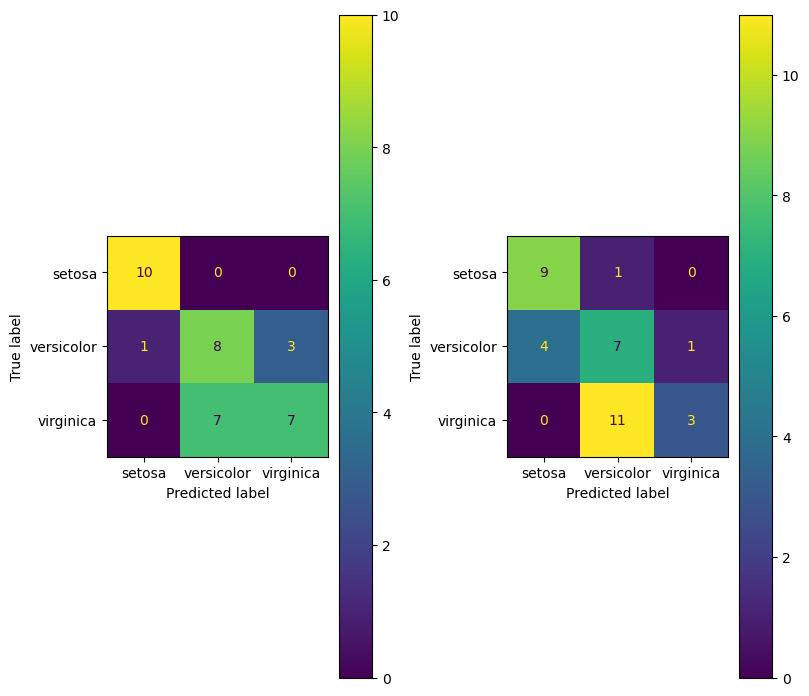

In [19]:
# These names were obtained above
target_names_iris = ['setosa', 'versicolor', 'virginica']

cm1 = confusion_matrix(y_val, log_reg_pred) # target value for validation and predicted independent variables (X_val from line 16)
cm2 = confusion_matrix(y_val, clf_pred)

fig, axs = plt.subplots(1, 2, figsize = (8, 7), layout='constrained')
ConfusionMatrixDisplay(cm1, display_labels = target_names_iris).plot(ax=axs[0])
ConfusionMatrixDisplay(cm2, display_labels = target_names_iris).plot(ax=axs[1])

In [20]:
print(classification_report(y_val, log_reg_pred, target_names=target_names_iris))

              precision    recall  f1-score   support

      setosa       0.91      1.00      0.95        10
  versicolor       0.53      0.67      0.59        12
   virginica       0.70      0.50      0.58        14

    accuracy                           0.69        36
   macro avg       0.71      0.72      0.71        36
weighted avg       0.70      0.69      0.69        36



In [21]:
print(classification_report(y_val, clf_pred, target_names=target_names_iris))

              precision    recall  f1-score   support

      setosa       0.69      0.90      0.78        10
  versicolor       0.37      0.58      0.45        12
   virginica       0.75      0.21      0.33        14

    accuracy                           0.53        36
   macro avg       0.60      0.57      0.52        36
weighted avg       0.61      0.53      0.50        36



# Evaluating chosen model through test set

The results are extremely good since this is a "toy dataset". In reality we do not expect numbers that are as perfect as those below. 

In [22]:
# Now we retrain our model on the train + validation data. 
log_reg_final = LogisticRegression().fit(X_train_full, y_train_full)
pred_test = log_reg_final.predict(X_test)

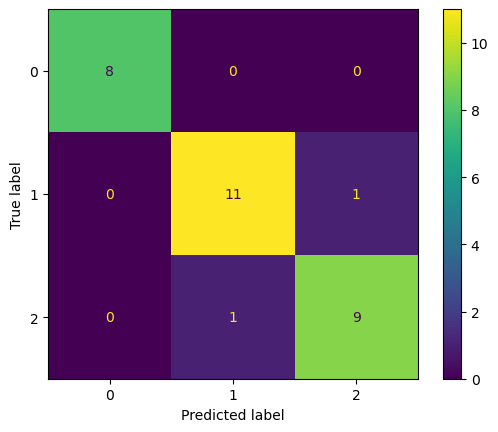

In [23]:
cm_test = confusion_matrix(y_test, pred_test)
ConfusionMatrixDisplay(cm_test).plot()

In [24]:
print(classification_report(y_test, pred_test, target_names=target_names_iris))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.92      0.92      0.92        12
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
.format()